<a href="https://colab.research.google.com/github/Lucien-Piat/DEL_Single_Tree_Detection/blob/main/Rotating_the_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Script to rotate all the images and flip them

Import all packages

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 19 16:45:55 2024

@author: Lucien
"""
import os
from skimage import io, transform, exposure
from os import walk
import matplotlib.pyplot as plt
import numpy as np
import warnings

Create several functions

In [2]:
def get_image_paths(directory):
    '''
    Get list of files in directory.
    '''
    try:
        files = []
        for (dirpath, dirnames, filenames) in os.walk(directory):
            files.extend(filenames)
        return files
    except FileNotFoundError:
        print("Directory not found.")
        return []

def load_image(input_folder, image_path):
    '''
    Load image from path.
    '''
    try:
        image = io.imread(os.path.join(input_folder, image_path))
        return image
    except FileNotFoundError:
        print("Image not found")
        return None

def rotate_image(image, angle):
    return transform.rotate(image, angle, resize=False)

def generate_all_angles(image, image_name, flip_image=False):
    '''
    Generate rotated images.
    '''
    angles = [90, 180, 270]
    images_list = [image]
    names_list = [image_name.split('.')[0] + '_0.tif']

    for i in angles:
      images_list.append(rotate_image(image, i))
      names_list.append(image_name.split('.')[0] + '_' + str(i) + '.tif')

    if flip_image:
      for i in range(4):
        images_list.append(np.fliplr(images_list[i]))
        names_list.append(names_list[i].split('.')[0] + '_f.tif')

    return images_list, names_list


def save_images(output_folder, names_list, images_list):
    '''
    Save images.
    '''
    try:
      for name, image in zip(names_list, images_list):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            io.imsave(os.path.join(output_folder, name), image)
    except Exception as e:
        print("Error saving images")

In [44]:
input_folder = 'input'
output_folder = 'output'

paths = get_image_paths(input_folder)

for i in paths :
  image = load_image(input_folder, i)

  images_list, names_list = generate_all_angles(image, i, True)

  save_images(output_folder, names_list, images_list)

In [48]:
!printf "Started with %d files, ended with %d files\n" $(ls -1 input | wc -l) $(ls -1 output | wc -l)

Started with 1 files, ended with 8 files


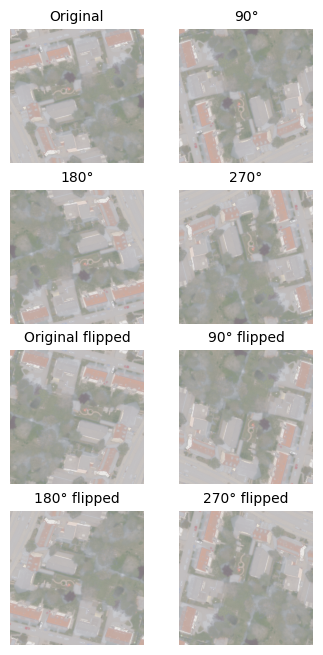

<ipython-input-46-b754f3e517f0>:47: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig('example_output.png', dpi=500, bbox_inches='tight')


In [46]:
fig, axes = plt.subplots(4, 2,  figsize=(4, 8), layout="constrained")

# Display each image on a separate subplot
axes[0, 0].imshow(images_list[0])
axes[0, 0].title.set_text('Original')
axes[0, 0].title.set_size(10)
axes[0, 0].axis('off')

axes[0, 1].imshow(images_list[1])
axes[0, 1].title.set_text('90°')
axes[0, 1].title.set_size(10)
axes[0, 1].axis('off')

axes[1, 0].imshow(images_list[2])
axes[1, 0].title.set_text('180°')
axes[1, 0].title.set_size(10)
axes[1, 0].axis('off')

axes[1, 1].imshow(images_list[3])
axes[1, 1].title.set_text('270°')
axes[1, 1].title.set_size(10)
axes[1, 1].axis('off')

axes[2, 0].imshow(images_list[4])
axes[2, 0].title.set_text('Original flipped')
axes[2, 0].title.set_size(10)
axes[2, 0].axis('off')

axes[2, 1].imshow(images_list[5])
axes[2, 1].title.set_text('90° flipped')
axes[2, 1].title.set_size(10)
axes[2, 1].axis('off')

axes[3, 0].imshow(images_list[6])
axes[3, 0].title.set_text('180° flipped')
axes[3, 0].title.set_size(10)
axes[3, 0].axis('off')

axes[3, 1].imshow(images_list[7])
axes[3, 1].title.set_text('270° flipped')
axes[3, 1].title.set_size(10)
axes[3, 1].axis('off')

fig.get_layout_engine().set(w_pad=0, h_pad=1,hspace=0,wspace=0)

# Show the plot
plt.show()

# Save the plor
fig.savefig('example_output.png', dpi=500, bbox_inches='tight')